# Places & Plantae Subset Sampler

Original notebook used to generate subsets of places and plantae used for CD-FSL.

In [1]:
import glob
import re
import os
from collections import defaultdict
from tqdm import tqdm
import pandas as pd
import numpy as np
import json
import shutil
import copy

In [2]:
roots = {
    "places": "/home/itsnamgyu/data/places365_standard/train",
    "plantae": "/home/itsnamgyu/data/Plantae",
}

In [3]:
def compile_paths(dataset_key):
    root = roots[dataset_key]
    all_paths = glob.glob("{}/**/*".format(root), recursive=True)
    all_paths.sort()
    paths_used = []
    paths_by_class = defaultdict(list)
    paths_by_extension = defaultdict(list)
    for path in tqdm(all_paths):
        if os.path.isdir(path):
            continue
        p1 = os.path.basename(path)
        p2 = os.path.basename(os.path.dirname(path))
        p3 = os.path.dirname(os.path.dirname(path))
        assert(p3 == root)

        paths_used.append(path)
        paths_by_class[p2].append(path)
        ext = p1.split(".")[-1]
        paths_by_extension[ext].append(path)
    
    print("Total Classes:   ", len(paths_by_class))
    print("Total Images:    ", len(paths_used))
    return paths_used, paths_by_class, paths_by_extension

In [4]:
def plot_class_distribution(paths_by_class, bins=10, ylim=[0, 25]):
    d = {
        "class": [],
        "count": [],
    }
    for k, v in paths_by_class.items():
        d["class"].append(k)
        d["count"].append(len(v))
    
    pd.DataFrame(d).loc[:,"count"].plot.hist(bins=bins, ylim=ylim)

# Places

In [5]:
all_paths, paths_by_class, paths_by_extension = compile_paths("places")

100%|██████████| 1803825/1803825 [00:12<00:00, 146019.01it/s]

Total Classes:    365
Total Images:     1803460


In [6]:
print("PATHS BY EXT")
print('-' * 80)
for k, v in paths_by_extension.items():
    print("{:30s}{:>10d}".format(k, len(v)))
print('-' * 80)

PATHS BY EXT
--------------------------------------------------------------------------------
jpg                              1803460
--------------------------------------------------------------------------------


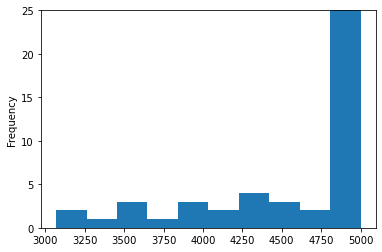

In [7]:
plot_class_distribution(paths_by_class)

## Sampling (Places)

In [8]:
PLACES_N_CLASSES = 16
PLACES_N_SAMPLES = 1715
PLACES_SEED = 0

In [9]:
classes = list(sorted(paths_by_class.keys()))
for paths in paths_by_class.values():
    paths.sort()

In [10]:
# RANDOM SAMPLING + SAVE
state = np.random.RandomState(seed=PLACES_SEED)

selected_classes = state.choice(classes, size=PLACES_N_CLASSES, replace=False)
selected_classes.sort()
print("SELECTED CLASSES".center(40).center(80, "#"))
print(selected_classes)
print()

root = roots["places"]
selected_paths_by_class = dict()
for cls in selected_classes:
    paths = state.choice(paths_by_class[cls], size=PLACES_N_SAMPLES, replace=False)
    paths.sort()
    relative_paths = []
    for p in paths:
        relative_paths.append(p.replace(root + "/", ""))
    selected_paths_by_class[cls] = relative_paths
    
print("SELECTED PATHS".center(40).center(80, "#"))
print(json.dumps(selected_paths_by_class,indent=4)[:1000])
print()

subset_path = "places_cdfsl_subset_{}_class_{}_sample_seed_{}.json".format(PLACES_N_CLASSES, PLACES_N_SAMPLES, PLACES_SEED)
with open(subset_path, "w") as f:
    json.dump(selected_paths_by_class, f)
print("Sampled subset saved to {}".format(subset_path))

####################            SELECTED CLASSES            ####################
['amusement_arcade' 'attic' 'bathroom' 'canal-natural' 'church-indoor'
 'corridor' 'dining_hall' 'field-wild' 'lecture_room'
 'natural_history_museum' 'patio' 'phone_booth' 'restaurant_patio' 'shed'
 'stable' 'veterinarians_office']

####################             SELECTED PATHS             ####################
{
    "amusement_arcade": [
        "amusement_arcade/00000002.jpg",
        "amusement_arcade/00000005.jpg",
        "amusement_arcade/00000010.jpg",
        "amusement_arcade/00000013.jpg",
        "amusement_arcade/00000015.jpg",
        "amusement_arcade/00000016.jpg",
        "amusement_arcade/00000023.jpg",
        "amusement_arcade/00000024.jpg",
        "amusement_arcade/00000026.jpg",
        "amusement_arcade/00000030.jpg",
        "amusement_arcade/00000031.jpg",
        "amusement_arcade/00000032.jpg",
        "amusement_arcade/00000033.jpg",
        "amusement_arcade/00000034.jpg",
  

## Create Subset Directory

In [11]:
SOURCE_DIR = roots["places"]
DEST_DIR = "places_cdfsl"

all_paths = []
for cls, paths in selected_paths_by_class.items():
    all_paths.extend(paths)
    
for path in tqdm(all_paths):
    source = os.path.join(SOURCE_DIR, path)
    dest = os.path.join(DEST_DIR, path)
    os.makedirs(os.path.dirname(dest), exist_ok=True)
    shutil.copyfile(source, dest)
    
print("Subset directory created at: {}".format(os.path.abspath(DEST_DIR)))

100%|██████████| 27440/27440 [00:01<00:00, 15049.63it/s]

Subset directory created at: /home/itsnamgyu/places_cdfsl


# Plantae

In [12]:
all_paths, paths_by_class, paths_by_extension = compile_paths("plantae")

100%|██████████| 130468/130468 [00:00<00:00, 146696.59it/s]


Total Classes:    2917
Total Images:     127551


In [13]:
print(json.dumps(paths_by_class, indent=4)[:2000])

{
    "5221": [
        "/home/itsnamgyu/data/Plantae/5221/0d84373be1864daa115b563c323e4835.jpg",
        "/home/itsnamgyu/data/Plantae/5221/1d3cc6b37ff661fd22e3108cdc3116b8.jpg",
        "/home/itsnamgyu/data/Plantae/5221/21ba1292cda931cfda56f62cb1504ea9.jpg",
        "/home/itsnamgyu/data/Plantae/5221/222f7f603db457d1316aeccd6ea4be66.jpg",
        "/home/itsnamgyu/data/Plantae/5221/4b5bd7d7c7fefffaa6d80ef3e7ad7e59.jpg",
        "/home/itsnamgyu/data/Plantae/5221/50441b8e1cca8ae51d4fe6e000eca6af.jpg",
        "/home/itsnamgyu/data/Plantae/5221/55152239cd907d349e7bd977b245b313.jpg",
        "/home/itsnamgyu/data/Plantae/5221/58b0759e3c5ca02c5fbe6559c798e95c.jpg",
        "/home/itsnamgyu/data/Plantae/5221/7e365b678aa31834b33bf1ba2993b16b.jpg",
        "/home/itsnamgyu/data/Plantae/5221/7f9511fafa356505c8629bbd616c9eff.jpg",
        "/home/itsnamgyu/data/Plantae/5221/80d8221bb6e061d79feac4dab74c98b3.jpg",
        "/home/itsnamgyu/data/Plantae/5221/8a15138e9d0b6710c005d6eaa2e44921.jpg",


In [14]:
print("PATHS BY EXT")
print('-' * 80)
for k, v in paths_by_extension.items():
    print("{:30s}{:>10d}".format(k, len(v)))
print('-' * 80)

PATHS BY EXT
--------------------------------------------------------------------------------
jpg                               127551
--------------------------------------------------------------------------------


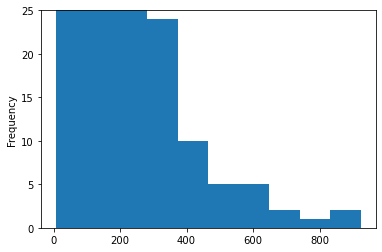

In [15]:
plot_class_distribution(paths_by_class)

### Sampling Classes w/ Most Examples (for Plantae)

In [16]:
d = {
    "class": [],
    "count": [],
}
for k, v in paths_by_class.items():
    d["class"].append(k)
    d["count"].append(len(v))

class_counts = pd.DataFrame(d)
class_counts = class_counts.sort_values("count", ascending=False)
class_counts.loc[:,"cumulative"] = class_counts["count"].cumsum()

In [23]:
class_counts.head(n=69).reset_index()

,index,class,count,cumulative
0,586,5807,923,923
1,913,6134,857,1780
2,2291,7512,761,2541
3,2521,7742,722,3263
4,1616,6837,711,3974
...,...,...,...,...
64,1975,7196,254,25646
65,735,5956,253,25899
66,2025,7246,252,26151
67,1520,6741,250,26401


## Sampling (Plantae)

In [18]:
PLANTAE_N_CLASSES = 69

In [19]:
class_counts = class_counts.sort_values("count", ascending=False)
selected_classes = list(class_counts["class"].iloc[:PLANTAE_N_CLASSES].values)
selected_classes.sort()
print("SELECTED CLASSES (TOP {})".format(PLANTAE_N_CLASSES).center(40).center(80, "#"))
print(selected_classes)
print()

root = roots["plantae"]
selected_paths_by_class = dict()
for cls in selected_classes:
    paths = paths_by_class[cls]
    relative_paths = []
    for p in paths:
        relative_paths.append(p.replace(os.path.join(root, ""), ""))
    relative_paths.sort()
    selected_paths_by_class[cls] = relative_paths

print("SELECTED PATHS".center(40).center(80, "#"))
print(json.dumps(selected_paths_by_class, indent=4)[:1000])
print()

subset_path = "plantae_cdfsl_subset_{}_class.json".format(PLANTAE_N_CLASSES)
with open(subset_path, "w") as f:
    json.dump(selected_paths_by_class, f)
print("Sampled subset saved to {}".format(subset_path))

####################       SELECTED CLASSES (TOP 69)        ####################
['5265', '5345', '5521', '5544', '5731', '5740', '5774', '5807', '5838', '5850', '5894', '5907', '5956', '6068', '6134', '6237', '6422', '6436', '6453', '6461', '6523', '6559', '6568', '6594', '6641', '6709', '6741', '6803', '6804', '6825', '6828', '6837', '6839', '6840', '6859', '6890', '6909', '6914', '7051', '7095', '7145', '7150', '7196', '7222', '7246', '7251', '7302', '7410', '7477', '7496', '7512', '7519', '7645', '7739', '7741', '7742', '7757', '7758', '7763', '7765', '7774', '7901', '7935', '7967', '7972', '8049', '8063', '8067', '8076']

####################             SELECTED PATHS             ####################
{
    "5265": [
        "5265/00548d18180572c92c844ea7ddfcaddd.jpg",
        "5265/00d15a1fd75da05f2e5bdf6bd4066398.jpg",
        "5265/014cdec4b38fbaf8725ad5f28dec9bc9.jpg",
        "5265/018fa2f428feca7da168c937fd459a6b.jpg",
        "5265/01bb178c2cd8c66dc8eb2765ad56cf07.jpg",
   

## Create Subset Directory

In [20]:
SOURCE_DIR = roots["plantae"]
DEST_DIR = "plantae_cdfsl"

all_paths = []
for cls, paths in selected_paths_by_class.items():
    all_paths.extend(paths)
    
for path in tqdm(all_paths):
    source = os.path.join(SOURCE_DIR, path)
    dest = os.path.join(DEST_DIR, path)
    os.makedirs(os.path.dirname(dest), exist_ok=True)
    shutil.copyfile(source, dest)
    
print("Subset directory created at: {}".format(os.path.abspath(DEST_DIR)))

100%|██████████| 26650/26650 [00:06<00:00, 3879.60it/s]

Subset directory created at: /home/itsnamgyu/plantae_cdfsl
